# Cole Nussbaumer Knaflic - Storytelling with Data_ Let’s Practice! Exercises 2.1 and 2.2

In [1]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Reading the data
data = pd.read_csv('data.csv')
data.head()

,Tier,Num Accounts,Accounts Percentage,Revenue Money,Revenue Percentage
0,A,77,7.08,4.68,25
1,A+,19,1.75,3.93,21
2,B,338,31.07,5.98,32
3,C,425,39.06,2.81,15
4,D,24,2.21,0.37,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tier                 5 non-null      object 
 1   Num Accounts         5 non-null      int64  
 2   Accounts Percentage  5 non-null      float64
 3   Revenue Money        5 non-null      float64
 4   Revenue Percentage   5 non-null      int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 328.0+ bytes


## PART 2.1: Improve this table

In [4]:
#Add another row to take into account the missing of data
new = [{'Tier':'Other','Num Accounts': 205,'Accounts Percentage':19,'Revenue Money':0.9,'Revenue Percentage': 5}]
data = data.append(new,ignore_index=True,sort=False)

In [5]:
data.head(6)

,Tier,Num Accounts,Accounts Percentage,Revenue Money,Revenue Percentage
0,A,77,7.08,4.68,25
1,A+,19,1.75,3.93,21
2,B,338,31.07,5.98,32
3,C,425,39.06,2.81,15
4,D,24,2.21,0.37,2
5,Other,205,19.00,0.90,5


In [6]:
#Round off the percentage accounts and revenue money column
data = data.round({'Accounts Percentage':0, 'Revenue Money':1})
data.head(6)

,Tier,Num Accounts,Accounts Percentage,Revenue Money,Revenue Percentage
0,A,77,7.0,4.7,25
1,A+,19,2.0,3.9,21
2,B,338,31.0,6.0,32
3,C,425,39.0,2.8,15
4,D,24,2.0,0.4,2
5,Other,205,19.0,0.9,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tier                 6 non-null      object 
 1   Num Accounts         6 non-null      int64  
 2   Accounts Percentage  6 non-null      float64
 3   Revenue Money        6 non-null      float64
 4   Revenue Percentage   6 non-null      int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
#Change the the type of the column of percentage account to integer
data = data.astype({"Accounts Percentage": int})
data.head(6)

,Tier,Num Accounts,Accounts Percentage,Revenue Money,Revenue Percentage
0,A,77,7,4.7,25
1,A+,19,2,3.9,21
2,B,338,31,6.0,32
3,C,425,39,2.8,15
4,D,24,2,0.4,2
5,Other,205,19,0.9,5


In [9]:
#Reorder the data 
data = data.reindex([1,0,2,3,4,5])
data.reset_index(drop=True, inplace=True)
data.head(6)

,Tier,Num Accounts,Accounts Percentage,Revenue Money,Revenue Percentage
0,A+,19,2,3.9,21
1,A,77,7,4.7,25
2,B,338,31,6.0,32
3,C,425,39,2.8,15
4,D,24,2,0.4,2
5,Other,205,19,0.9,5


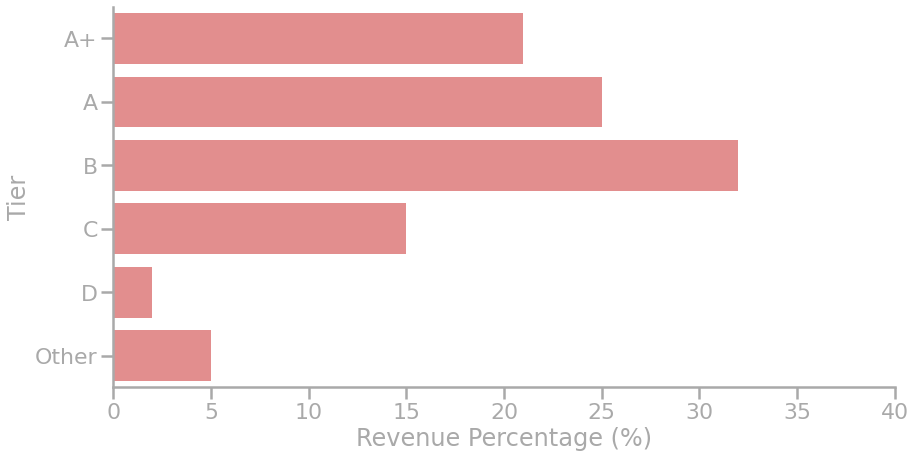

In [10]:
#Horizontal bar chart of the revenues percentage
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster") #to get a  better display 

fig, ax = plt.subplots()
fig = sns.barplot(x='Revenue Percentage', y='Tier', data=data, color='lightcoral')
fig.set(xlim=(0, 40), xlabel="Revenue Percentage (%)", ylabel="Tier")

#Labels
plt.xlabel('Revenue Percentage (%)', color = 'darkgrey')
plt.ylabel('Tier', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')


sns.despine() #To take the top and right axes off
plt.savefig('Revenue Percenatge hbarchart', dpi = 300, bbox_inches = 'tight')#bbox_inches saves the whole graph and there is no cuts
plt.show()

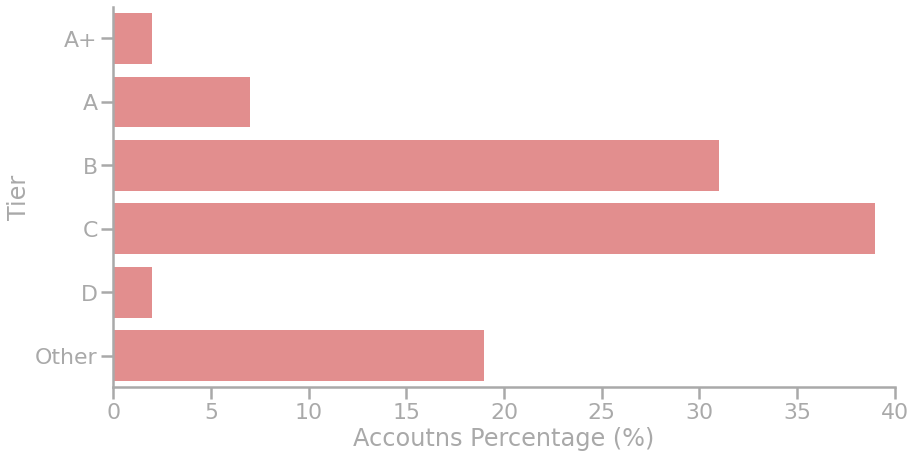

In [11]:
#Horizontal bar chart of the revenues percentage
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster") #to get a  better displya for the download of the graph

fig, ax = plt.subplots()
fig = sns.barplot(x='Accounts Percentage', y='Tier', data=data, color='lightcoral')
fig.set(xlim=(0, 40), xlabel="Accounts Percentage (%)", ylabel="Tier")

#Labels
plt.xlabel('Accoutns Percentage (%)', color = 'darkgrey')
plt.ylabel('Tier', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')

sns.despine() #To take the top and right axes off
plt.savefig('Accounts Percentage hbarchart', dpi = 300,bbox_inches = 'tight')#bbox_inches saves the whole graph and there is no cuts
plt.show()

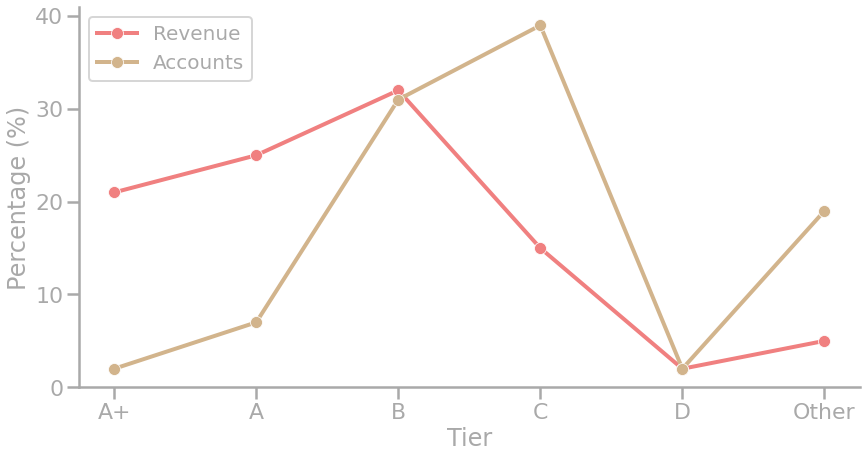

In [12]:
#Line graph of the revenues and accounts percentage
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster") #to get a  better display 

fig, ax = plt.subplots()
ax = sns.lineplot(data=data, x=data['Tier'], y=data['Revenue Percentage'], color="lightcoral", linewidth=4, marker='o')
ax = sns.lineplot(data=data, x=data['Tier'], y=data['Accounts Percentage'], color="tan", linewidth=4, marker='o')
ax.set(ylim=(0, 41), ylabel="Percentage (%)", xlabel="Tier")

#Legend and labels
ax.legend(['Revenue', 'Accounts'], ncol=1, loc="upper left", frameon=True, fontsize=20,labelcolor='darkgrey')
plt.xlabel('Tier', color = 'darkgrey')
plt.ylabel('Percentage (%)', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')


sns.despine() #To take the top and right axes off
plt.savefig('Percentage Line chart', dpi = 300, bbox_inches = 'tight') #bbox_inches saves the whole graph and there is no cuts
plt.show()

In [13]:
#A smaller dataset for the creation of the grouped charts
df = data[['Tier', 'Accounts Percentage', 'Revenue Percentage']]
df = df.rename(columns={'Tier': 'Tier', 'Accounts Percentage': 'Accounts', 'Revenue Percentage':'Revenue' })
df

,Tier,Accounts,Revenue
0,A+,2,21
1,A,7,25
2,B,31,32
3,C,39,15
4,D,2,2
5,Other,19,5


In [14]:
#Melting the dataset in order to make a grouped bar chart with seaborn
df2 = df.melt('Tier', var_name='Legend',  value_name='Percentage')
df2

,Tier,Legend,Percentage
0,A+,Accounts,2
1,A,Accounts,7
2,B,Accounts,31
3,C,Accounts,39
4,D,Accounts,2
5,Other,Accounts,19
6,A+,Revenue,21
7,A,Revenue,25
8,B,Revenue,32
9,C,Revenue,15


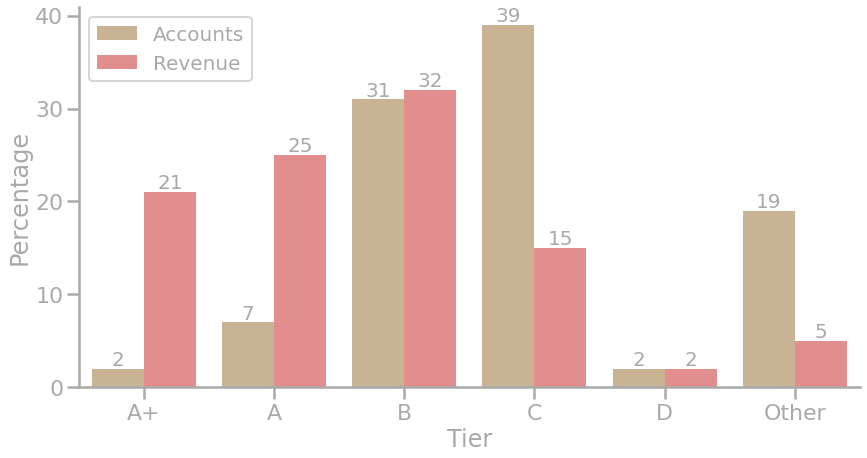

In [15]:
#Grouped bar chart of the revenue and accounts percentage
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster")  #to get a better display 

fig, ax = plt.subplots()
f = sns.barplot(x="Tier", y="Percentage", hue='Legend', data=df2, palette= ['tan','lightcoral'])

#Legend and labels
ax.legend(ncol=1, loc="upper left", frameon=True, fontsize=20, labelcolor = 'darkgrey')
plt.xlabel('Tier', color = 'darkgrey')
plt.ylabel('Percentage', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')

#Annotate the values of the bars
for p in f.patches:
    f.annotate("{:.0f}".format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9), size=20, color= 'darkgrey',
                   textcoords='offset points')



sns.despine() #To take the top and right axes off
plt.savefig('Percentage barchart', dpi = 300, bbox_inches = 'tight') #bbox_inches saves the whole graph and there is no cuts
plt.show()

In [16]:
#Final dataset (with the addition of the Total row)
total = [{'Tier':'Total','Num Accounts': 1088,'Accounts Percentage':100,'Revenue Money':18.7,'Revenue Percentage': 100}]
data = data.append(total, ignore_index=True,sort=False)
data.head(7)

,Tier,Num Accounts,Accounts Percentage,Revenue Money,Revenue Percentage
0,A+,19,2,3.9,21
1,A,77,7,4.7,25
2,B,338,31,6.0,32
3,C,425,39,2.8,15
4,D,24,2,0.4,2
5,Other,205,19,0.9,5
6,Total,1088,100,18.7,100


## PART 2.2: VISUALIZE

In [17]:
#Reading the dataset
datos = pd.read_csv('datos.csv')
datos.head(10)

,Campaign Year,Meals Served
0,2010,40139
1,2011,127020
2,2012,168193
3,2013,153115
4,2014,202102
5,2015,232897
6,2016,277912
7,2017,205350
8,2018,233389
9,2019,232797


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Campaign Year  10 non-null     int64
 1   Meals Served   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [19]:
datos['Meals Served'].max()

277912

In [20]:
datos['Meals Served'].median()

203726.0

In [21]:
#To add the year in the heatmap
datos2 = datos.set_index('Campaign Year')
datos2

,Meals Served
Campaign Year,
2010,40139
2011,127020
2012,168193
2013,153115
2014,202102
2015,232897
2016,277912
2017,205350
2018,233389


In [22]:
#Create a color palette
cmap = LinearSegmentedColormap.from_list('SiennaChocolatePeruLightcoralRed', 
                                         ['tan', 'peachpuff', 'mistyrose', 'pink', 'Salmon', 'Indianred','Black'])

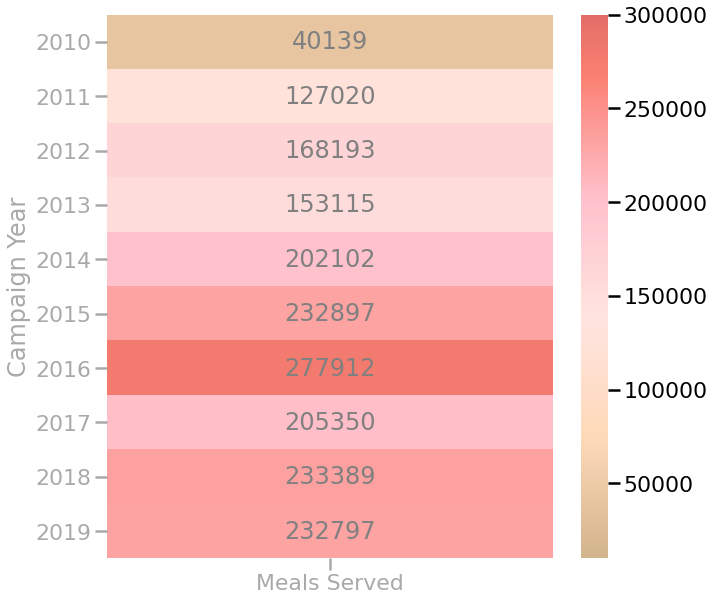

In [23]:
#Heatmap of the meals
plt.rcParams['figure.figsize'] =  [10,10]

fig, ax = plt.subplots()
sns.heatmap(datos2, annot = True, cmap=cmap, fmt='g', 
            vmax= 300000, vmin=10000, center=203726,
            annot_kws={'color': 'grey'},)

#Labels
plt.ylabel('Campaign Year', color = 'darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')


plt.savefig('Meals Heatmap.png', dpi = 300, bbox_inches = 'tight') #bbox_inches saves the whole graph and there is no cuts
plt.show()

<Figure size 1080x720 with 0 Axes>

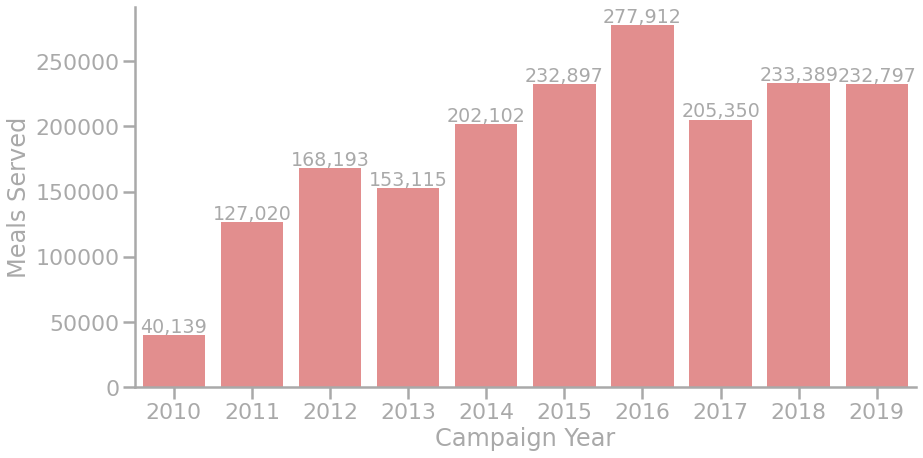

In [27]:
#Bar chart of the data with annot
plt.figure(figsize = (15, 10))

fig, ax = plt.subplots()

sns.set_context("poster") #to get a  better display 
fig = sns.barplot(x="Campaign Year", y="Meals Served", data=datos, palette= ['lightcoral'])

plt.xlabel('Campaign Year', color = 'darkgrey')
plt.ylabel('Meals Served', color = 'darkgrey')

#Spines
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')


#Annotate the values of the bars 
for bar in fig.patches:
    fig.annotate("{:,.0f}".format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2,  # x-coordinate: bar.get_x() + bar.get_width() / 2
                    bar.get_height()), # y-coordinate: bar.get_height()
                  ha='center', va='center', #ha and va stand for the horizontal and vertical alignment
                   size=19, xytext=(0, 8), # free space to be left to make graph pleasing: (0, 8)
                   textcoords='offset points', color= 'darkgrey')

sns.despine() #To take the top and right axes off
plt.savefig('Meals served barchart', dpi = 300, bbox_inches = 'tight')#bbox_inches saves the whole graph and there is no cuts
plt.show()

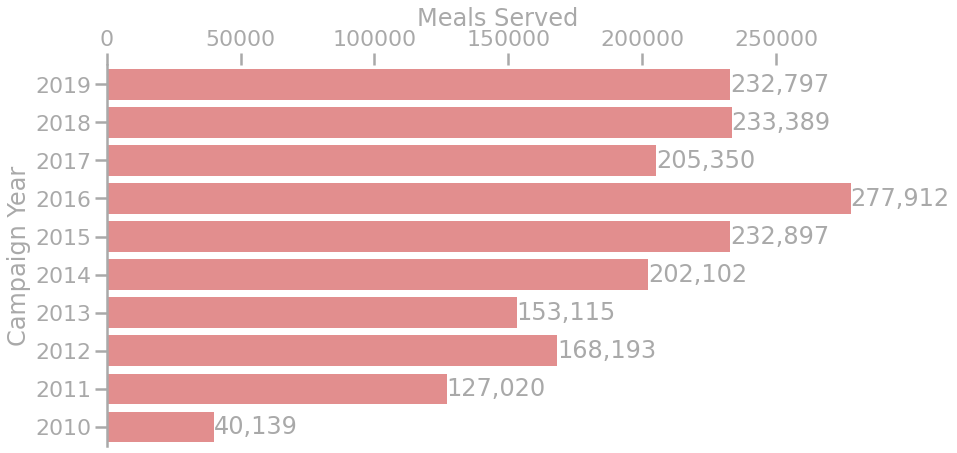

In [25]:
#HBar chart of the data with annot
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster") #to get a  better display 

fig, ax = plt.subplots()
fig = sns.barplot(y="Campaign Year", x="Meals Served", data=datos, 
                  color= 'lightcoral', orient='h',
                  order= [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])

#Labels 
plt.ylabel('Campaign Year', color = 'darkgrey')
plt.xlabel('Meals Served', color = 'darkgrey')

#Spines colors
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')


#Annotate the values of the bars
for p in fig.patches:
    width = p.get_width()    # get bar length
    fig.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            "{:,.0f}".format(width), # set variable to display
            ha = 'left',   # horizontal alignment
            va = 'center',  # vertical alignment
            color= 'darkgrey') #color of the text
    
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
#ax.xaxis.set_visible(False)

sns.despine(bottom=True) #To take the top and right axes off

plt.savefig('Meals served hbarchart', dpi = 300,bbox_inches = 'tight')
plt.show()

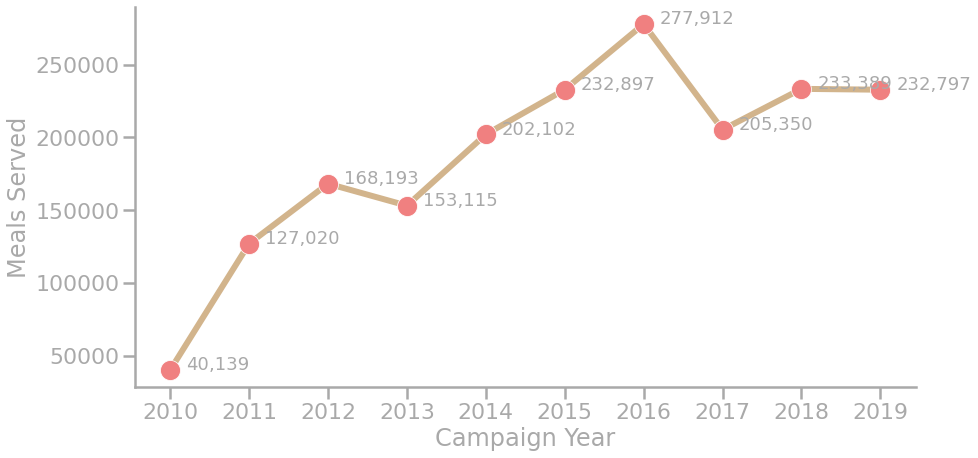

In [26]:
#Line of the data with annot
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster") #to get a  better display 

fig, ax = plt.subplots()
ax = sns.lineplot(data=datos, x=datos['Campaign Year'], y=datos['Meals Served'], 
                  color="tan", linewidth=6, marker='o', markerfacecolor='lightcoral', markersize= 20)

#Labels
plt.xlabel('Campaign Year', color = 'darkgrey')
plt.ylabel('Meals Served', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')

#Annotate the values 
for v in datos.iterrows():
    plt.text(v[1][0]+.2, v[1][1], "{:,}".format(v[1][1]), fontsize = 18, color= 'darkgrey')

ax.set(xticks=datos['Campaign Year'].values) #To make all the years display
sns.despine() #To take the top and right axes off
plt.savefig('Meals served line chart', dpi = 300, bbox_inches = 'tight')
plt.show()